In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()

In [36]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(['target','flower_name'],axis=1)
y = df.target

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape,y_train.shape

((120, 4), (120,))

In [43]:
from sklearn.neighbors import KNeighborsClassifier

error1 = []
error2 = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train!=y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test!=y_pred2))


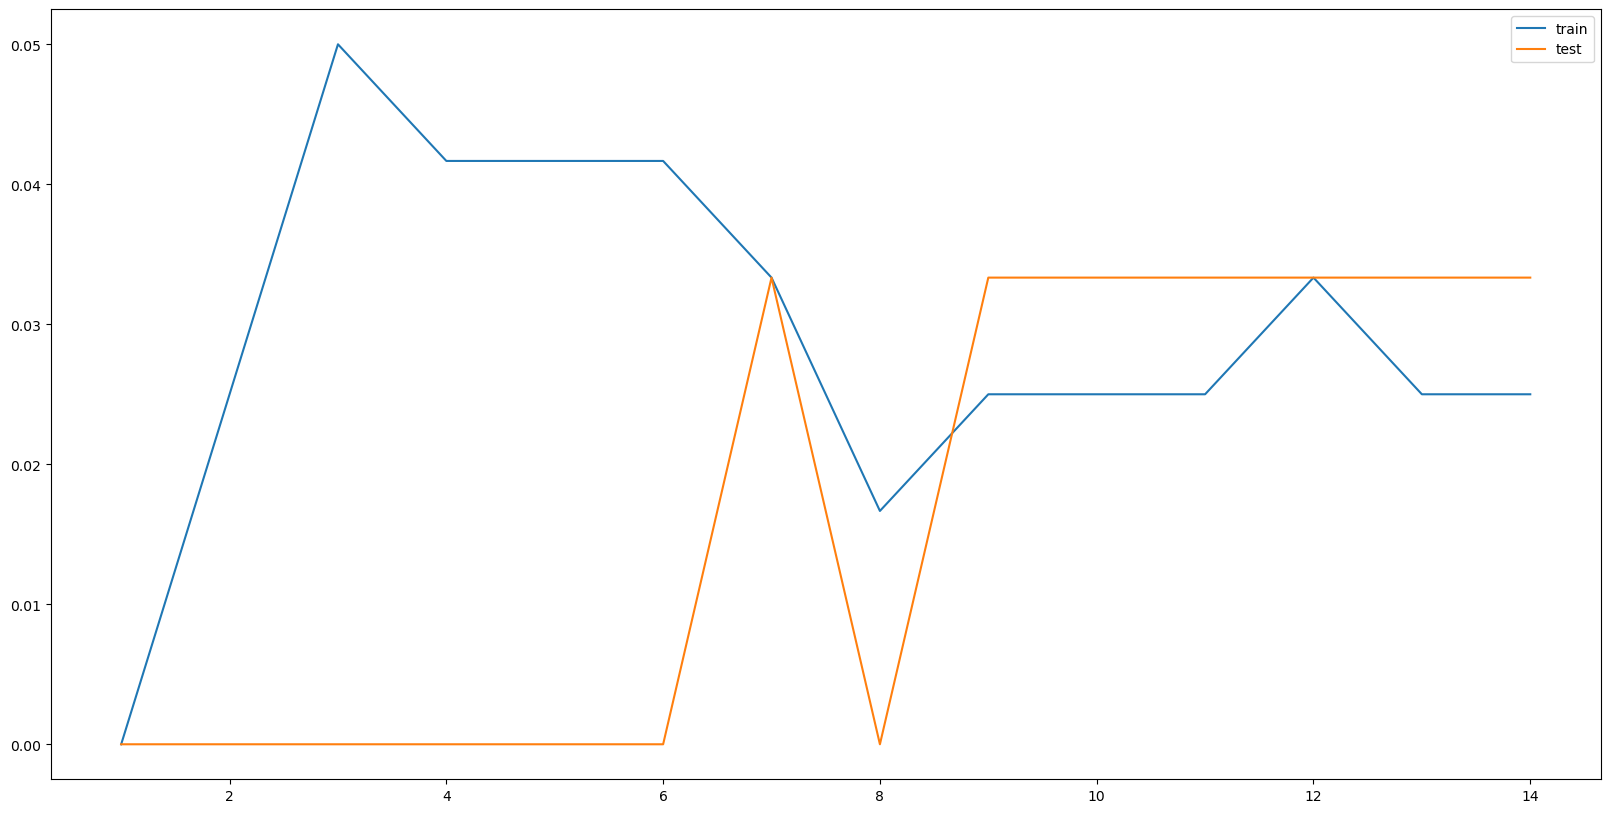

In [44]:
plt.figure(figsize=(20,10))
plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label="test")
plt.legend()

In [45]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

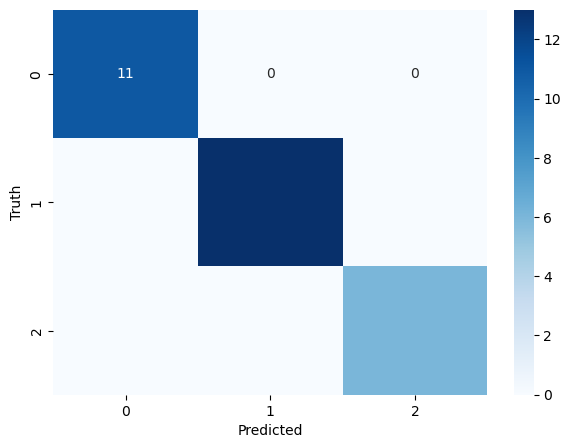

In [47]:
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test),
)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

